# Integration Methods

In [7]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 6]
plt.style.use('ggplot')

![Integral](figure_05_integral.png)

## Define and plot function

In [8]:
def func(x):
    return 0.5 + 0.1*x + 0.2*x**2 + 0.03*x**3 

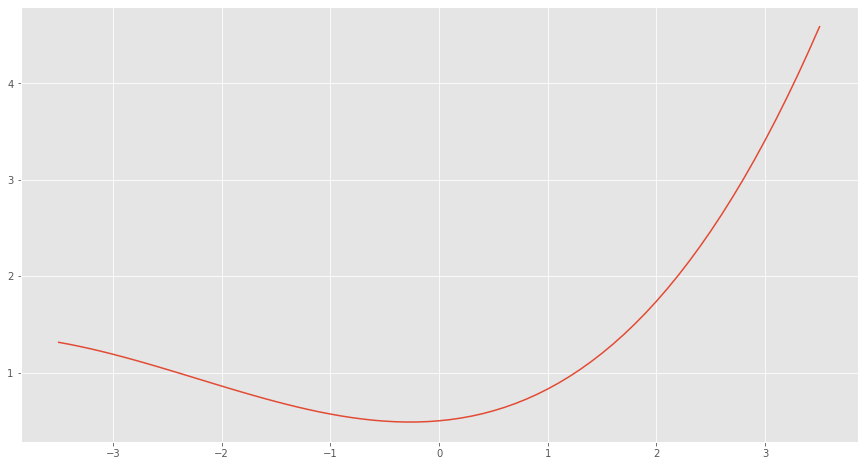

In [6]:
x_list = np.linspace(-3.5, 3.5, 71)

plt.plot(x_list, func(x_list));

## Analytical solution

\\( f(x) = \frac{1}{2} + \frac{1}{10}x + \frac{1}{5}x^2 + \frac{3}{100}x^3 \\)

\\( A = \int_{-3}^3 f(x)\,\mathrm{d}x = \int_{-3}^3\left(\frac{1}{2} + \frac{1}{10}x + \frac{1}{5}x^2 + \frac{3}{100}x^3\right)\,\mathrm{d}x = \left[\frac{1}{2}x + \frac{1}{20}x^2 + \frac{1}{15}x^3 + \frac{3}{400}x^4\right]_{-3}^3\\)

In [9]:
( 1/2*(3) + 1/20*(3)**2 + 1/15*(3)**3 + 3/400*(3)**4 ) - ( 1/2*(-3) + 1/20*(-3)**2 + 1/15*(-3)**3 + 3/400*(-3)**4 )

6.6

## Create data

In [10]:
x_points = np.linspace(-3,3,13)
data = np.array([x_points, func(x_points)])

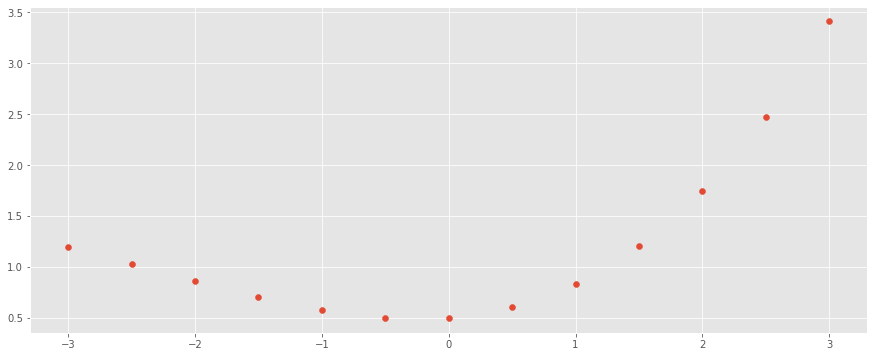

In [13]:
plt.scatter(data[0], data[1]);

## 1. Sum

\\( A = \int_{a}^b f(x)\,\mathrm{d}x \approx \frac{b-a}{n-1}\sum_{i=1}^n f(x_i)\\)

Edges are problematic, as they are overrepresented. Furthermore, this only really works if the data is equidistant.

In [16]:
def integralSum(data):
    return np.sum(data[1]) * (data[0,-1] - data[0,0]) /( len(data[1]) - 1 )

In [17]:
integralSum(data)

7.800000000000001

## 2. Trapezoidal method 